<h1>Does Location Relative to the Equator Correlate Weather Patterns?</h1>

<h2>Dependencies and Range of Latitude and Longitude</h2>

In [107]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [108]:
todays_date = str(dt.now()).split(" ")[0]

<h2>Acquire Cities</h2>

In [109]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_count += 1

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

627

<h2>Pull Weather Data By City</h2>

In [110]:
#Function to iterate through cities and return dictionaries of weather data per city
city_weathers = []

#batch variables
#batch_set = 50

def get_weather(indices):
    
    print("Beginning Data Retrieval")
    print("--------------------------------------")
    
    #for loop to go through the list of cities
    for city in range(len(indices)):
        
        #querey url
        base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
        query_url = base_url + str(indices[city]) + '&units=imperial' +'&appid=' + api_key
        
        # Get one of the posts
        city_response = requests.get(query_url).json()
        
        #error handling
        try:
            
            print(f"Processing Record {city + 1} of Set | {indices[city]}")
        
            #assign variables 
            city_country = city_response['sys']['country']
            city_date = city_response['dt']
            city_clouds = city_response['clouds']['all']
            city_humidity = city_response['main']['humidity']
            city_lat = city_response['coord']['lat']
            city_lng = city_response['coord']['lon']
            city_temp = city_response['main']['temp_max']
            city_wind = city_response['wind']['speed']
        
            city_weather = {
                "city": indices[city],
                "country": city_country,
                "date": city_date,
                "cloudiness": city_clouds,
                "humidity": city_humidity,
                "latitude": city_lat,
                "longitude": city_lng,
                "max temperature": city_temp,
                "wind speed": city_wind
                }
        
        
        except (KeyError, IndexError):
            
            print("Missing field/result... skipping.")
            
            city_weather = {
                "city": np.nan,
                "country": np.nan,
                "date": np.nan,
                "cloudiness": np.nan,
                "humidity": np.nan,
                "latitude": np.nan,
                "longitude": np.nan,
                "max temperature": np.nan,
                "wind speed": np.nan
            }
        
        #append each dictionary to the list
        city_weathers.append(city_weather)



# for x in range(0, city_count, batch_set):
#     set_num = batch_set[x]
#     get_weather(cities) 

get_weather(cities)    

Beginning Data Retrieval
--------------------------------------
Processing Record 1 of Set | ilulissat
Processing Record 2 of Set | rikitea
Processing Record 3 of Set | shingu
Processing Record 4 of Set | avarua
Processing Record 5 of Set | atuona
Processing Record 6 of Set | port alfred
Processing Record 7 of Set | xinzhi
Processing Record 8 of Set | thompson
Processing Record 9 of Set | bluff
Processing Record 10 of Set | yulara
Processing Record 11 of Set | iztapa
Processing Record 12 of Set | ushuaia
Processing Record 13 of Set | taltal
Processing Record 14 of Set | tuktoyaktuk
Processing Record 15 of Set | cape town
Processing Record 16 of Set | meadow lake
Processing Record 17 of Set | belushya guba
Missing field/result... skipping.
Processing Record 18 of Set | tiksi
Processing Record 19 of Set | busselton
Processing Record 20 of Set | port-gentil
Processing Record 21 of Set | tabukiniberu
Missing field/result... skipping.
Processing Record 22 of Set | hobart
Processing Record 2

Processing Record 192 of Set | ustye
Processing Record 193 of Set | francisco beltrao
Processing Record 194 of Set | pecica
Processing Record 195 of Set | tumannyy
Missing field/result... skipping.
Processing Record 196 of Set | mar del plata
Processing Record 197 of Set | sibiti
Processing Record 198 of Set | ramasukha
Missing field/result... skipping.
Processing Record 199 of Set | nam som
Processing Record 200 of Set | kieta
Processing Record 201 of Set | tuatapere
Processing Record 202 of Set | ajdabiya
Processing Record 203 of Set | seoul
Processing Record 204 of Set | boli
Processing Record 205 of Set | berlevag
Processing Record 206 of Set | shuiji
Processing Record 207 of Set | manzil jamil
Missing field/result... skipping.
Processing Record 208 of Set | oro valley
Processing Record 209 of Set | isangel
Processing Record 210 of Set | emirdag
Processing Record 211 of Set | rudbar
Missing field/result... skipping.
Processing Record 212 of Set | suifenhe
Processing Record 213 of S

Processing Record 376 of Set | mnogovershinnyy
Processing Record 377 of Set | buala
Processing Record 378 of Set | muzaffarabad
Processing Record 379 of Set | portland
Processing Record 380 of Set | san cristobal
Processing Record 381 of Set | hihifo
Missing field/result... skipping.
Processing Record 382 of Set | hobyo
Processing Record 383 of Set | tiznit
Processing Record 384 of Set | broome
Processing Record 385 of Set | koster
Processing Record 386 of Set | comodoro rivadavia
Processing Record 387 of Set | altay
Processing Record 388 of Set | oytal
Processing Record 389 of Set | komsomolskiy
Processing Record 390 of Set | fevralsk
Missing field/result... skipping.
Processing Record 391 of Set | sept-iles
Processing Record 392 of Set | carlsbad
Processing Record 393 of Set | torbay
Processing Record 394 of Set | bantogon
Processing Record 395 of Set | yumen
Processing Record 396 of Set | coquimbo
Processing Record 397 of Set | saint-pierre
Processing Record 398 of Set | saint-josep

Processing Record 563 of Set | buraydah
Processing Record 564 of Set | cuamba
Processing Record 565 of Set | jiddah
Missing field/result... skipping.
Processing Record 566 of Set | pitimbu
Processing Record 567 of Set | merke
Processing Record 568 of Set | fengrun
Processing Record 569 of Set | bismil
Processing Record 570 of Set | ust-kuyga
Processing Record 571 of Set | jiuquan
Processing Record 572 of Set | haibowan
Missing field/result... skipping.
Processing Record 573 of Set | vanavara
Processing Record 574 of Set | khasan
Processing Record 575 of Set | santa maria
Processing Record 576 of Set | mae ramat
Processing Record 577 of Set | gogrial
Missing field/result... skipping.
Processing Record 578 of Set | wulanhaote
Missing field/result... skipping.
Processing Record 579 of Set | vila
Processing Record 580 of Set | tommot
Processing Record 581 of Set | karratha
Processing Record 582 of Set | mathathane
Processing Record 583 of Set | autun
Processing Record 584 of Set | dawson
P

<h2>Send Output to CSV</h2>

In [111]:
#write city_weathers to a csv

keys = city_weathers[0].keys()

output_data_file = "cities.csv"

with open(output_data_file, 'w') as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for weather in city_weathers:
            writer.writerow(weather)

<h2>Display Dataframe</h2>

In [120]:
#display the dataframe

df = pd.DataFrame(city_weathers)
weather_df = df.dropna()

weather_df.count()

city               557
cloudiness         557
country            557
date               557
humidity           557
latitude           557
longitude          557
max temperature    557
wind speed         557
dtype: int64

In [121]:
weather_df['date'] = weather_df['date'].astype("str")
weather_df.head()

/Users/ashleymcgee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city,cloudiness,country,date,humidity,latitude,longitude,max temperature,wind speed
0,ilulissat,20.0,GL,1551894600.0,34.0,69.22,-51.10,17.60,3.36
1,rikitea,64.0,PF,1551896264.0,95.0,-23.12,-134.97,81.53,19.30
2,shingu,100.0,JP,1551896265.0,100.0,33.72,135.99,55.70,22.55
3,avarua,80.0,CK,1551895200.0,74.0,-21.21,-159.78,78.80,12.75
4,atuona,44.0,PF,1551896265.0,100.0,-9.80,-139.03,82.21,17.52


<h2>Visualization</h2>

<h3>Latitude vs Temperature Plot</h3>

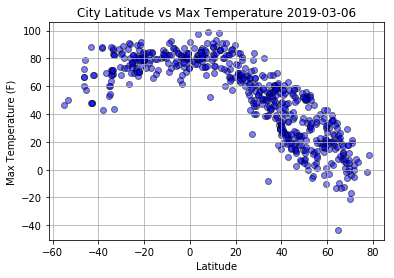

In [122]:
lat_temp_data = weather_df.groupby('city').sum()
y_axis_temp = lat_temp_data['max temperature']
x_axis_temp = lat_temp_data['latitude']
plt.scatter(x_axis_temp, y_axis_temp, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("City Latitude vs Max Temperature %s" % todays_date)
plt.savefig("citylattemp.png")
plt.show()

<h4>Max Temperatures Relative to City Latitude</h4>
<p>Judging by the random sampling of coordinates taken from citipy, the city selection has a broad range of city locations. As we move below the equator, we can see that the high temperature for the day remained above 60 degrees Fahrenheit up to the -40 degrees south Latitude point. That is a significantly longer range of high temperatures than those above the equator, where temperatures begin to drop below 60 degrees Fahrenheit at about the 20 degrees north Latitude point. This has a lot to do with the fact that we're approaching fall south of the equator. Temperatures can be expected to be more mild this time of year. In the north-western and north-eastern hemispheres above the equator, we are experiencing a long, frigid winter. At roughly the equator, temperatures remain above 60 degrees Fahrenheit, with only 15 cities coming in with temperatures above 90 degrees Fahreneheit as of March 6, 2019. Given the persistent colloquialism that the closer to the equator one goes the hotter it gets, one would think more cities near the equator would report higher daily temperatures.</p>

<h3>Latitude vs Humidity Plot</h3>

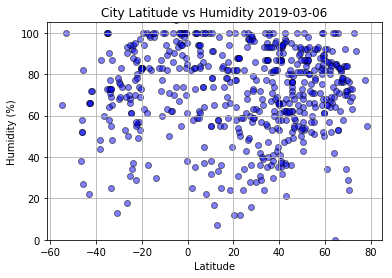

In [123]:
lat_humid_data = weather_df.groupby('city').mean()
x_axis_humid = lat_humid_data['latitude']
y_axis_humid = lat_humid_data['humidity']
plt.scatter(x_axis_humid, y_axis_humid, color='blue', edgecolor="black", alpha=0.5)
plt.ylim(0, 105)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity %s" % todays_date)
plt.grid()
plt.savefig("citylathumid.png")
plt.show()

<h3>Latitude vs Cloudiness Plot</h3>

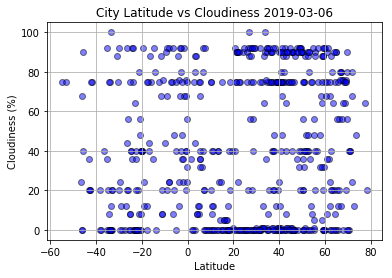

In [124]:
lat_clouds_data = weather_df.groupby('city').sum()
x_axis_clouds = lat_clouds_data['latitude']
y_axis_clouds = lat_clouds_data['cloudiness']
plt.scatter(x_axis_clouds, y_axis_clouds, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness %s" % todays_date)
plt.grid()
plt.savefig("citylatclouds.png")
plt.show()

<h4>Cloudiness vs Location Relative to the Equator</h4>
<p>It would appear that directly near and south of the equator (north of -20 degrees south Latitude) cloudiness tends to taper off that day. Though relative humidity plays a role in cloud formation, it would appear that it is not necessarily a cause of cloud formation, which is the presence of water condensation in the atmosphere. Normally, clouds form when warm, humid air from the ground rises to an elevation cool enough to form condensation. As we see in the humidity figure, a large cluster of cities near the equator seemed to experience high humidity (approaching 100%). On the same day, same set of cities on the cloudiness figure, there is a gap corresponding to the cluster on the humidity figure. Some other mitigating factor plays a role in cloud formation, and it is my belief that elevation and population density may be the missing links. Without at least the elevation levels of those cities to visualize beside the humidity and cloudiness figures, there is no other reasonable explanation for the lack of clouds in cities near the equator experiencing near 100% relative humidity.</p>

<h3>Latitude vs Wind Speed</h3>

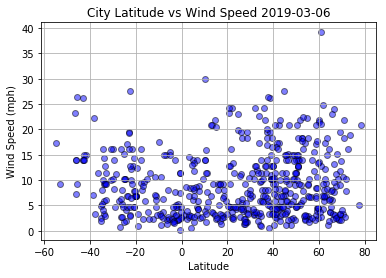

In [125]:
lat_wind_data = weather_df.groupby('city').sum()
x_axis_wind = lat_wind_data['latitude']
y_axis_wind = lat_wind_data['wind speed']
plt.scatter(x_axis_wind, y_axis_wind, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed %s" % todays_date)
plt.grid()
plt.savefig("citylatwinds.png")
plt.show()

<h4>City Wind Speeds Relative to the Equator</h4>
<p>One cannot observe wind speed without also observing temperature. As temperatures rise, air pressure increases. As air pressure increases from one area to the next, wind speeds increase. Also notice how those five are further away from the equator, where pressure changes are more volatile. Again, I don't see this as unusual. In the mild and temperate temperatures recorded yesterday, and given their spread in the temperature plot, we can see that the 166 cities recorded between -40 degrees south Latitude and 20 degrees north Latitude have a fairly concentrated selection of cities of low or zero windspeeds near the equator. As one moves further north of the equator, wind speeds become more varied, reaching above 22mph at roughly 40 degrees north Latitude. In other words, the relative uniformity of moderate temperatures nearer to the equator means longer gradients of air pressure, therefore slower wind speeds.</p>